# Titanic Data Analysis
in this project i work on Titanic data and try to figure out questions like what factor made people more likely to survive and others 

## Reading data 

In [1]:
import unicodecsv
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
path = 'C:\\Users\\aemra\\Documents\\Python\\Nanodegree\\Project 2'
os.chdir(path)

In [2]:
titanic_df=pd.read_csv('train.csv')
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.describe()

C:\Users\aemra\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
#some datas from age column are missing 

df=titanic_df.dropna(subset=['Age'])

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [6]:
numeric_variables=list(df.dtypes[df.dtypes!='object'].index)
df[numeric_variables].head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


## Question 1 : What factor made people more likely to survive?
### Survuve and Sex relation

In [7]:
#Standarilizng the data Survive
def standardize_colum(column):
    return (column-column.mean())/column.std()

In [8]:
standardize_colum(df['Survived']).describe()

count    7.140000e+02
mean    -1.310810e-16
std      1.000000e+00
min     -8.264408e-01
25%     -8.264408e-01
50%     -8.264408e-01
75%      1.208313e+00
max      1.208313e+00
Name: Survived, dtype: float64

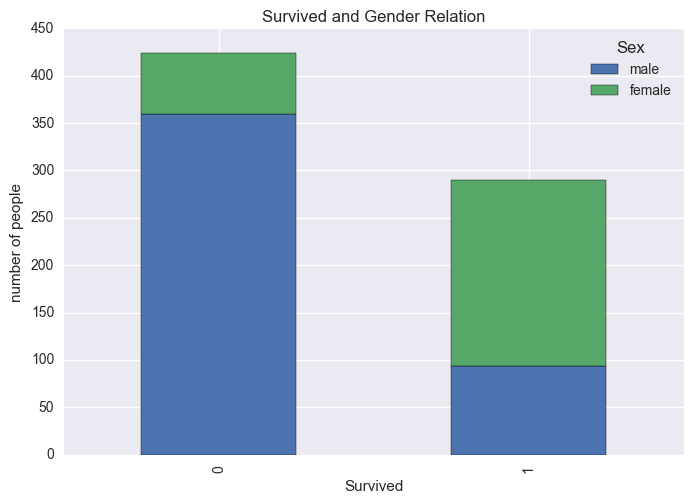

In [9]:
df1=(df.groupby(['Survived', 'Sex'])).count().unstack('Sex').fillna(0)['PassengerId']
df1[['male', 'female']].plot(kind='bar', stacked=True)
plt.title("Survived and Gender Relation")
plt.ylabel("number of people")
plt.show()

***

as we can see most of the people who survive is females but this is not enough to make comment on this part of data

***



In [10]:
total_gender=df.groupby('Sex').size()
port_class_groups=df.groupby(['Sex', 'Survived'], as_index=False).size()*100/total_gender
print (port_class_groups)

Sex     Survived
female  0           24.521073
        1           75.478927
male    0           79.470199
        1           20.529801
dtype: float64


***
form this data we can say that more than %75 of the female population has survived but %79.5 of males are died so;
usualy womans and childs are being resqued first in this kind a stuation. but we did not look the data from age perspective so that it is early to commend that.

### Age and Gender effect on Survive

# Age and Survived

### ages criteria

###### 0-19  --> Young
###### 20-39 --> Middle
###### 40-80 --> Old 

In [11]:
def agetoLetter(num):
    if num<15:
        return "Y"
    elif num>14 and num<40:
        return "M"
    else:
        return "O"

In [12]:
df['Age']=df['Age'].apply(agetoLetter)

C:\Users\aemra\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
age_gender=df.groupby(['Age','Sex','Survived'])['PassengerId'].count().unstack('Age')
age_gender

Age                M   O   Y
Sex    Survived             
female 0          37  12  15
       1         131  42  24
male   0         252  90  18
       1          53  19  21

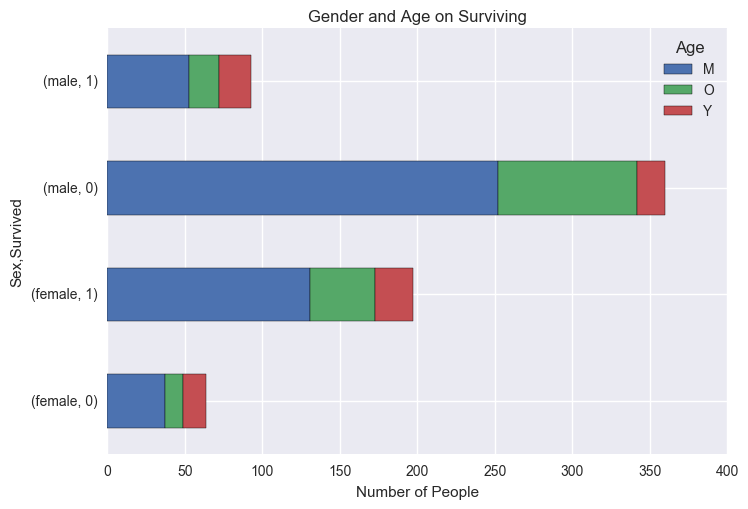

In [14]:
age_gender.plot(kind='barh', stacked=True)
plt.title("Gender and Age on Surviving")
plt.xlabel("Number of People")
plt.show()

as we can see it is hard to say that also childs are resqued firstly. 

###     
### Embarked might be another factor

In [15]:
df2 = df.groupby(['Embarked','Survived', 'Pclass'])['PassengerId'].count().unstack('Survived').fillna(0)
df2

Survived           0   1
Embarked Pclass         
C        1        21  53
         2         7   8
         3        23  18
Q        1         1   1
         2         1   1
         3        18   6
S        1        42  66
         2        82  74
         3       229  61

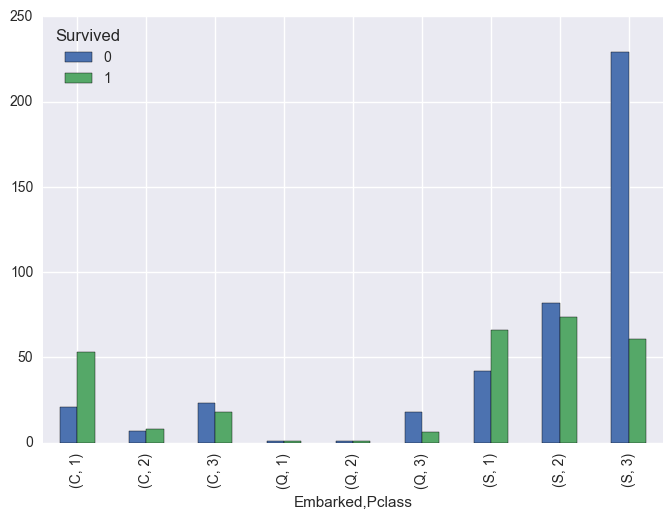

In [16]:
df2[[0, 1]].plot(kind='bar', stacked=False)
plt.show()

this chart show us in first and second classes people more likely to be alive :D

### cabin and survive relation

In [17]:
cabin_survive=df.groupby(['Cabin', 'Survived'])['PassengerId'].count().unstack('Cabin')

In [18]:
total_per_embarkation_port = df.groupby('Embarked').size()
port_class_groups = df.groupby(['Embarked','Pclass'], as_index=False).size()*100 / total_per_embarkation_port
port_class_groups

Embarked  Pclass
C         1         56.923077
          2         11.538462
          3         31.538462
Q         1          7.142857
          2          7.142857
          3         85.714286
S         1         19.494585
          2         28.158845
          3         52.346570
dtype: float64

### I also want to check if there is or not any relation between fare and age

In [26]:
def correlation(x,y):
    std_x=(x-x.mean())/x.std(ddof=0)
    std_y=(y-y.mean())/y.std(ddof=0)
    return (std_x*std_y).mean()

In [27]:
tdf=titanic_df.dropna(subset=['Age'])

In [28]:
correlation(tdf['Age'],tdf['Fare'])

0.09606669176903883

the value is positive this show us two veriable is has relation between them but number is small so relation is not stong.

# Summary

according to all calculation to survive the titanic;
<l1> famale people were put on lifeboats first
<l1> wealthy people were put on lifeboats first


also we prove that more people age more likely to pay more fare 

